In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

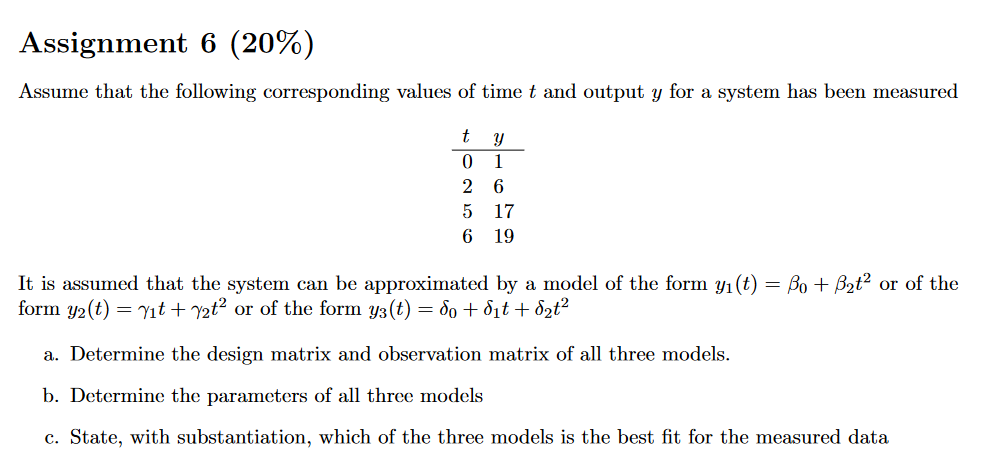

In [9]:
t = np.array([0, 2, 5, 6])
y = np.array([1, 6, 17, 19])

# Design matrices
X1 = np.column_stack([np.ones(len(t)), t**2])
X2 = np.column_stack([t, t**2])
X3 = np.column_stack([np.ones(len(t)), t, t**2])

print("Design Matrices:")
print("X1 =\n", X1)
print("X2 =\n", X2)
print("X3 =\n", X3)

print("\nObservation Matrix:")
print("y =\n", y.reshape(-1, 1))
# Parameters
B1 = np.linalg.solve(X1.T @ X1, X1.T @ y)
B2 = np.linalg.solve(X2.T @ X2, X2.T @ y)
B3 = np.linalg.solve(X3.T @ X3, X3.T @ y)

print("\nParameters:")
print(f"y1(t) = {B1[0]:.2f} + {B1[1]:.4f}t²")
print(f"y2(t) = {B2[0]:.2f}t + {B2[1]:.4f}t²")
print(f"y3(t) = {B3[0]:.2f} + {B3[1]:.4f}t + {B3[2]:.4f}t²")
# SSR
SSR1 = np.sum((y - X1 @ B1)**2)
SSR2 = np.sum((y - X2 @ B2)**2)
SSR3 = np.sum((y - X3 @ B3)**2)

print(f"\nSSR: {SSR1:.3f}, {SSR2:.3f}, {SSR3:.3f}")
print(f"Best: Model {np.argmin([SSR1, SSR2, SSR3]) + 1}")

Design Matrices:
X1 =
 [[ 1.  0.]
 [ 1.  4.]
 [ 1. 25.]
 [ 1. 36.]]
X2 =
 [[ 0  0]
 [ 2  4]
 [ 5 25]
 [ 6 36]]
X3 =
 [[ 1.  0.  0.]
 [ 1.  2.  4.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]

Observation Matrix:
y =
 [[ 1]
 [ 6]
 [17]
 [19]]

Parameters:
y1(t) = 2.74 + 0.4930t²
y2(t) = 3.24t + 0.0015t²
y3(t) = 0.78 + 2.7641t + 0.0607t²

SSR: 10.645, 2.061, 1.432
Best: Model 3


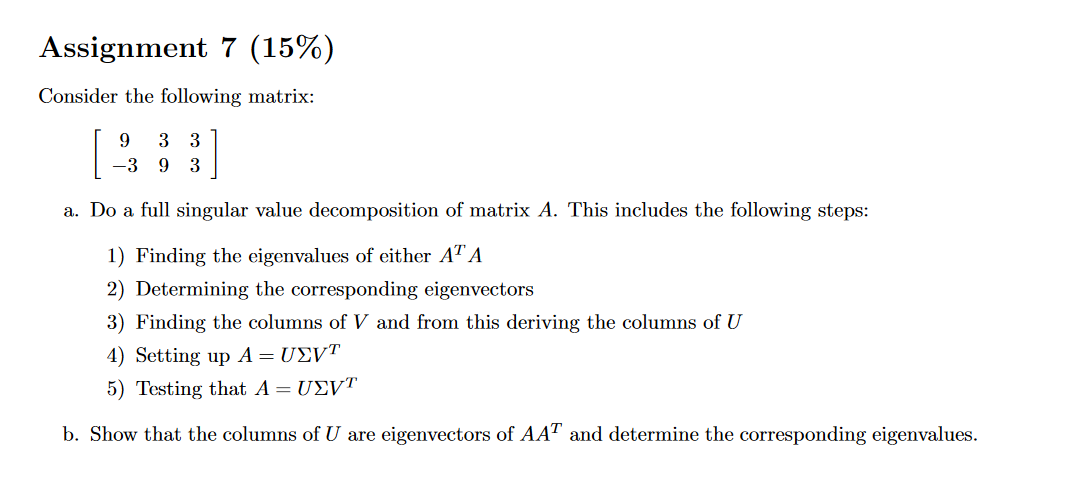

In [32]:
A = Matrix([[9, 3, 3], [-3, 9, 3]])
ATA = A.T * A


# 1. Find eigenvalues and eigenvectors of ATA
vecs = ATA.eigenvects()
pprint(vecs)

# a) SVD construction
s1 = sqrt(vecs[2][0])  # sqrt of largest eigenvalue
s2 = sqrt(vecs[1][0])  # sqrt of second eigenvalue

v1 = vecs[2][2][0].normalized()
v2 = vecs[1][2][0].normalized()
v3 = vecs[0][2][0].normalized()

u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2

U = u1.row_join(u2)
V = v1.row_join(v2).row_join(v3)
Vt = V.T
S = diag(s1, s2).row_join(zeros(2,1))

display(Math('U \Sigma V^T = {}{}{}'.format(latex(U), latex(S), latex(Vt))))
display(Latex("Test:"))
display(U*S*Vt)
display(V)


# b) Show that columns of U are eigenvectors of AA^T
AAT = A * A.T
print("\nb) AA^T =", AAT)

# Check that AA^T * u1 = λ1 * u1
AAT_u1 = AAT * u1
lambda1_u1 = s1**2 * u1  # eigenvalue = σ²
print("AA^T * u1 =", AAT_u1)
print("λ1 * u1 =", lambda1_u1)
print("Equal?", AAT_u1.equals(lambda1_u1))

# Check that AA^T * u2 = λ2 * u2
AAT_u2 = AAT * u2
lambda2_u2 = s2**2 * u2  # eigenvalue = σ²
print("AA^T * u2 =", AAT_u2)
print("λ2 * u2 =", lambda2_u2)
print("Equal?", AAT_u2.equals(lambda2_u2))

print("\nEigenvalues of AA^T:", [s1**2, s2**2])


⎡⎛      ⎡⎡-1/5⎤⎤⎞  ⎛       ⎡⎡-2⎤⎤⎞  ⎛        ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢    ⎥⎥⎟  ⎜       ⎢⎢  ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢-2/5⎥⎥⎟, ⎜90, 1, ⎢⎢1 ⎥⎥⎟, ⎜108, 1, ⎢⎢2⎥⎥⎟⎥
⎢⎜      ⎢⎢    ⎥⎥⎟  ⎜       ⎢⎢  ⎥⎥⎟  ⎜        ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 1  ⎦⎦⎠  ⎝       ⎣⎣0 ⎦⎦⎠  ⎝        ⎣⎣1⎦⎦⎠⎦


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

⎡9   3  3⎤
⎢        ⎥
⎣-3  9  3⎦

⎡√6  -2⋅√5   -√30 ⎤
⎢──  ──────  ─────⎥
⎢6     5       30 ⎥
⎢                 ⎥
⎢√6    √5    -√30 ⎥
⎢──    ──    ─────⎥
⎢3     5       15 ⎥
⎢                 ⎥
⎢√6           √30 ⎥
⎢──    0      ─── ⎥
⎣6             6  ⎦


b) AA^T = Matrix([[99, 9], [9, 99]])
AA^T * u1 = Matrix([[54*sqrt(2)], [54*sqrt(2)]])
λ1 * u1 = Matrix([[54*sqrt(2)], [54*sqrt(2)]])
Equal? True
AA^T * u2 = Matrix([[-45*sqrt(2)], [45*sqrt(2)]])
λ2 * u2 = Matrix([[-45*sqrt(2)], [45*sqrt(2)]])
Equal? True

Eigenvalues of AA^T: [108, 90]
